In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

from sklearn.utils import shuffle, compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc

from imblearn.over_sampling import SMOTE, ADASYN

import tensorflow as tf
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.165980e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.086869e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.490107e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.177556e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406455e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


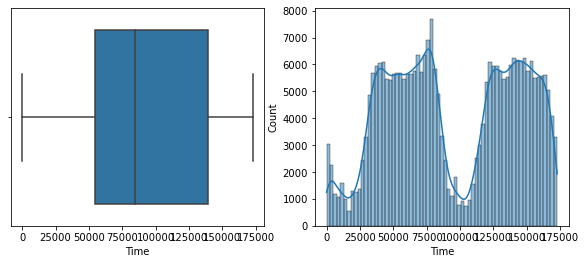

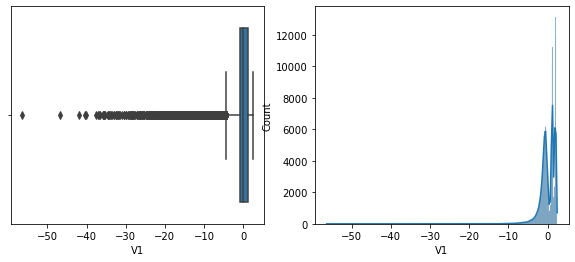

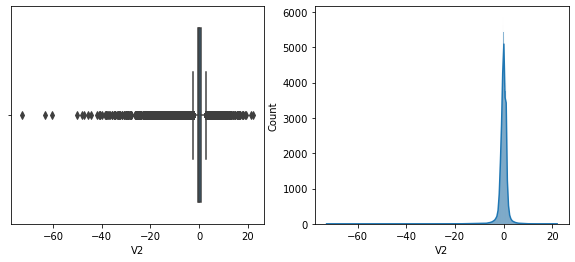

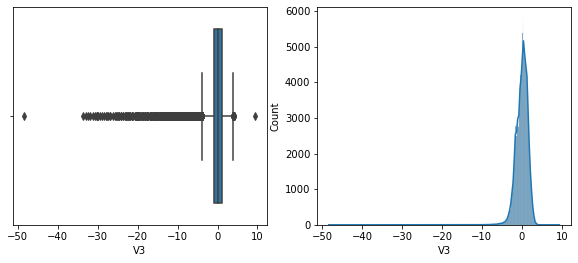

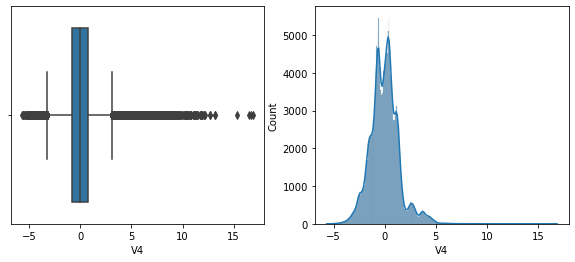

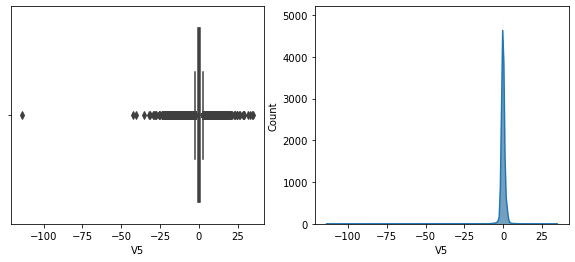

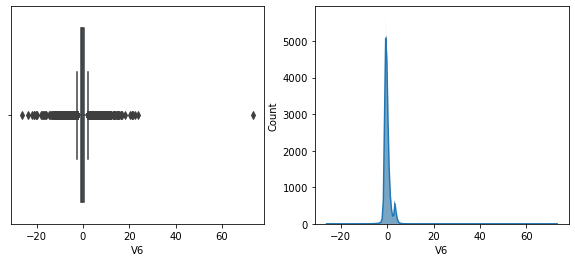

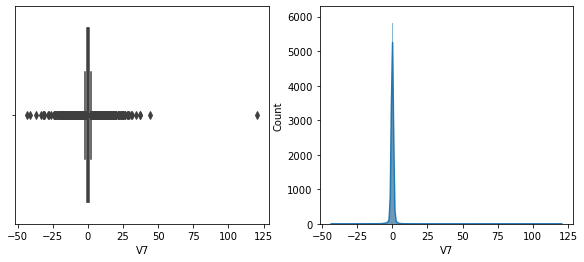

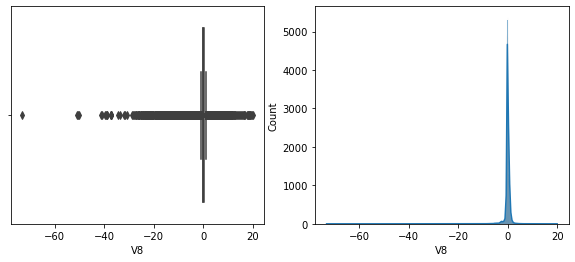

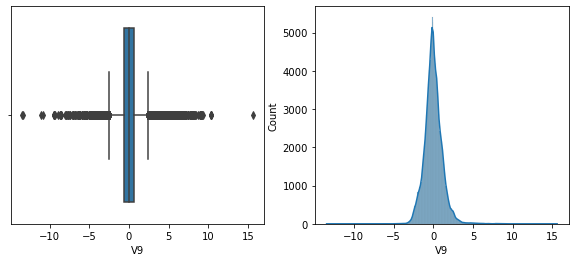

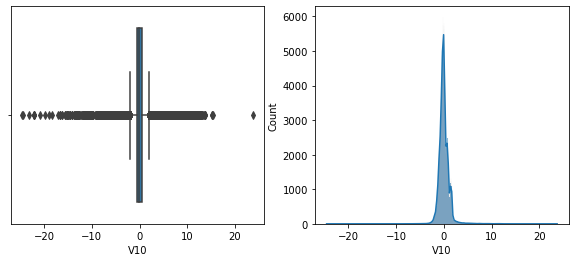

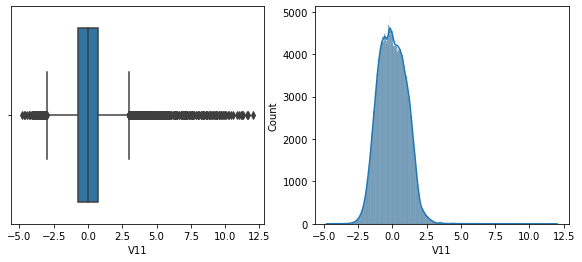

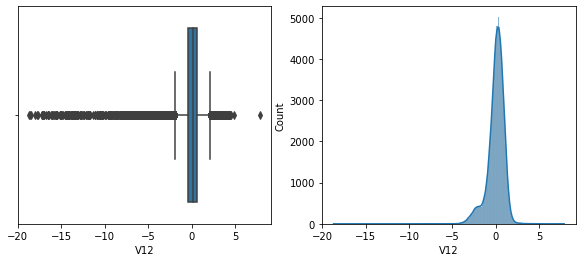

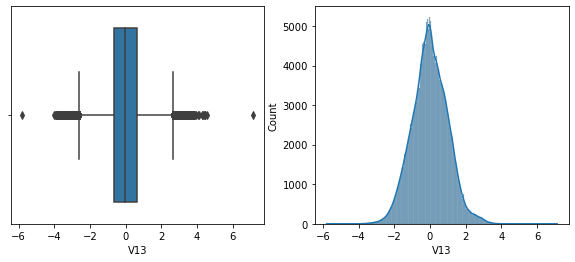

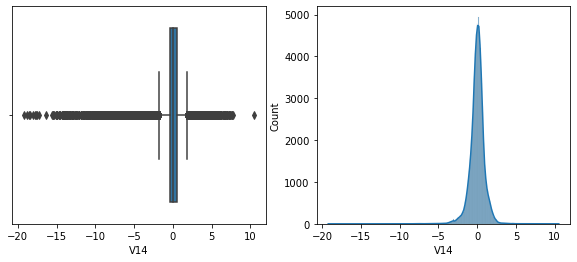

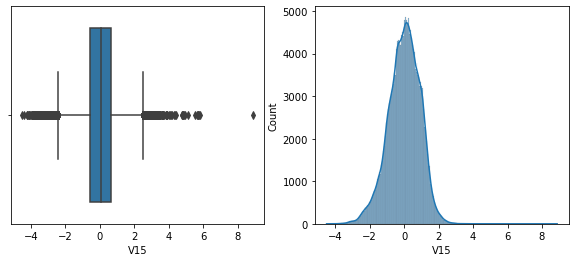

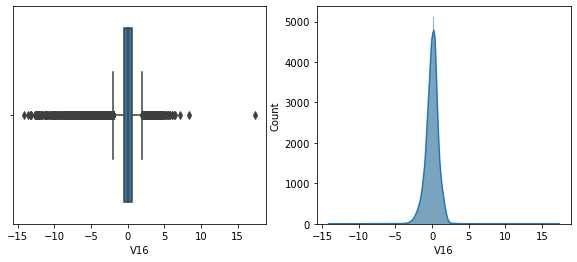

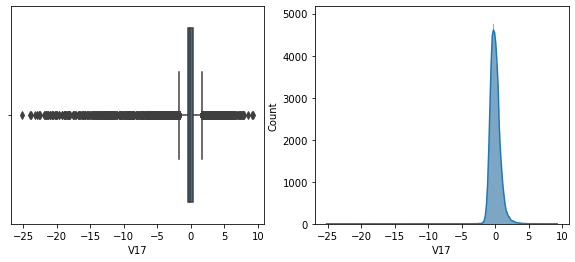

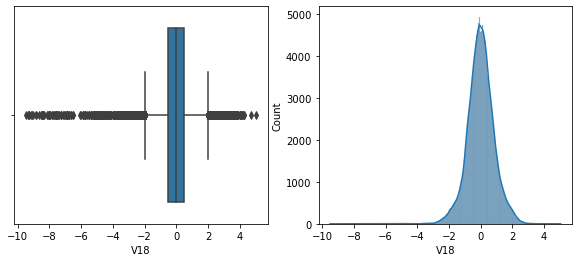

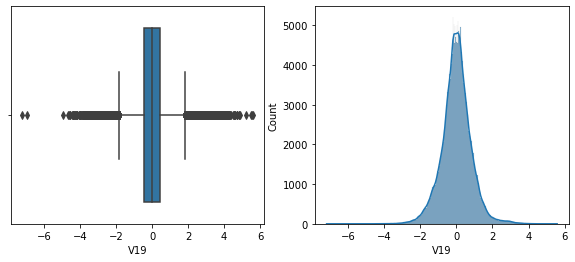

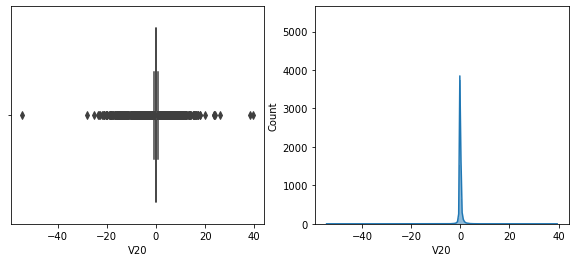

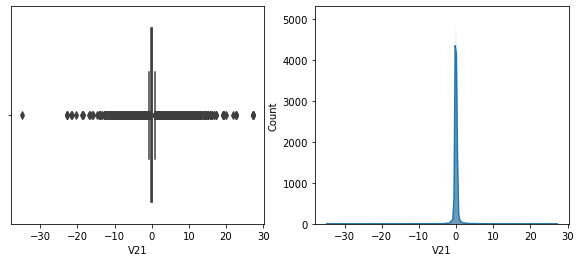

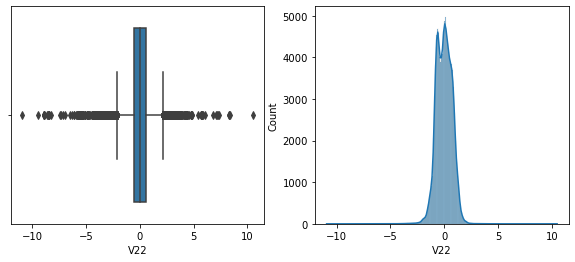

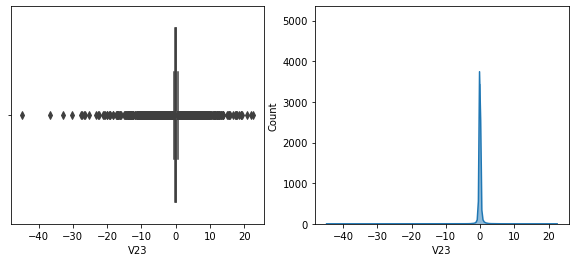

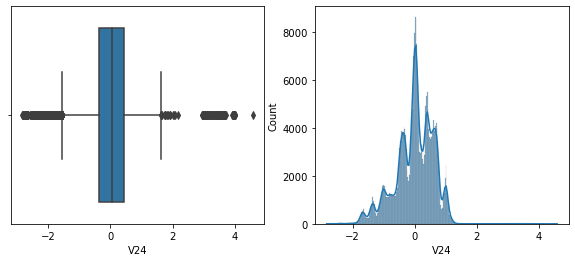

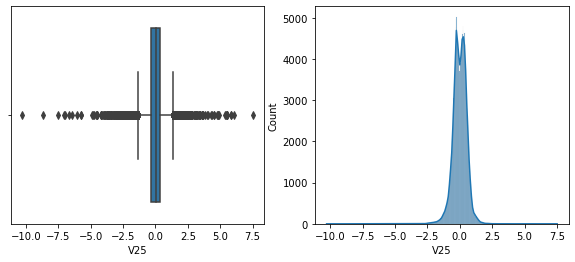

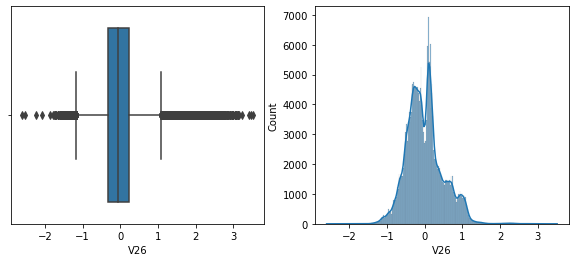

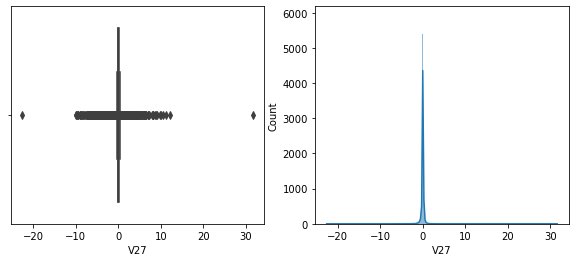

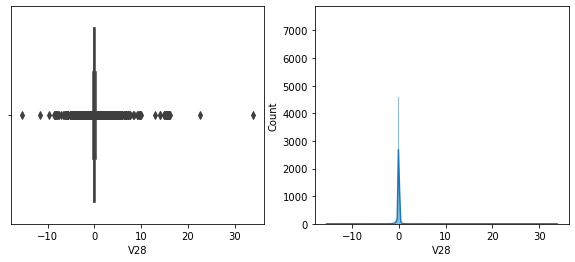

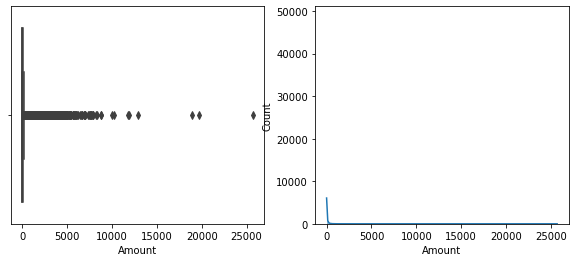

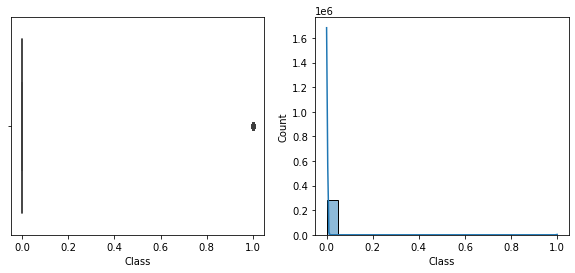

In [7]:
# Most features contain outliers
for feats in df.columns:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
    
    ax0 = axes[0]
    sns.boxplot(data=df, x=feats, ax=ax0)
    
    ax1 = axes[1]
    sns.histplot(data=df, x=feats, kde=True, ax=ax1)
    
    plt.show()

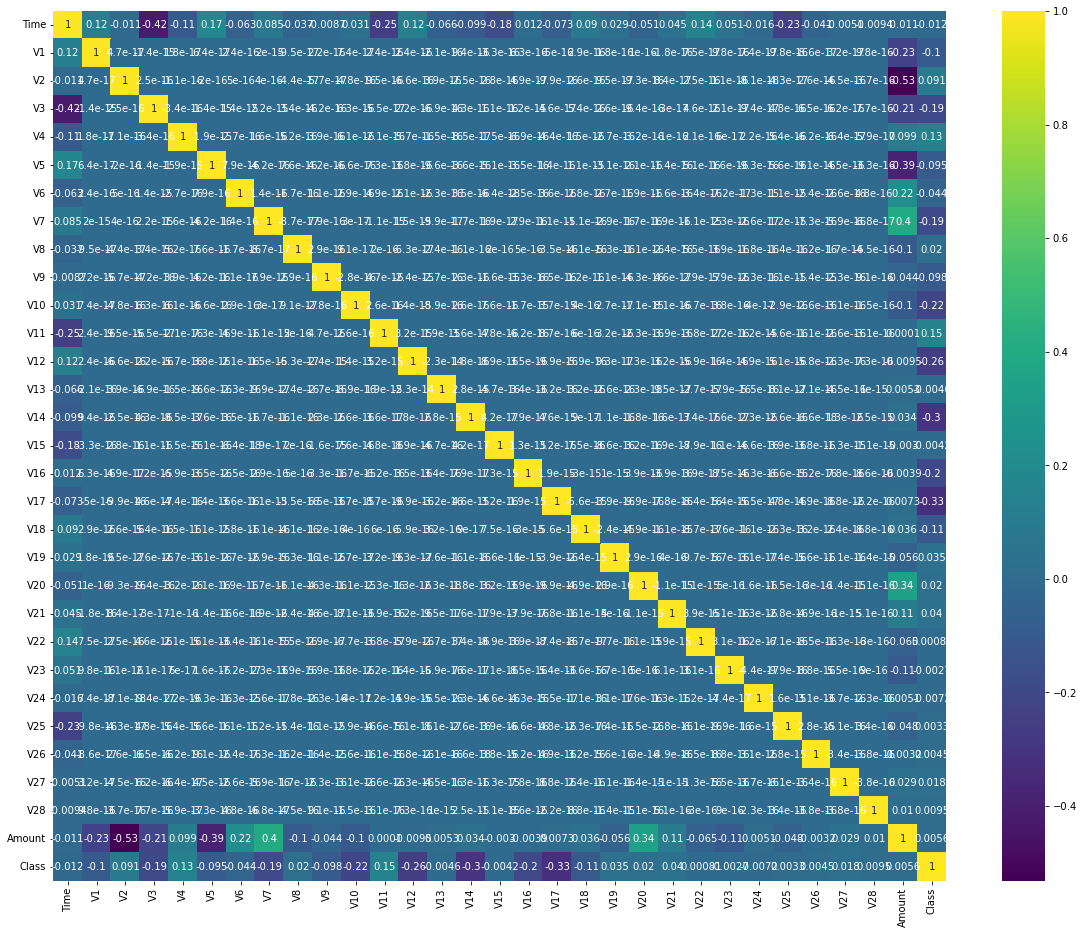

In [8]:
plt.figure(figsize=(20,16))
df_corr = df.corr()
sns.heatmap(df_corr, annot=True, cmap='viridis')
plt.show()

In [9]:
# log tranformation
df['Amount_log'] = np.log1p(df['Amount'])

In [10]:
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [11]:
# Find outliers and handle it 
def handle_outliers(df, column_name, method=None):
    
    if method is None:
        print('No method provieded. Returning Original Data.')
        return df
    
    df_copy = df.copy()
    if method == 'median':
        
        # calculate the median value
        median = df_copy[column_name].median()
        
        # Use IQR Method
        Q1 = df_copy[column_name].quantile(0.25)
        Q3 = df_copy[column_name].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        
        # if not outliers return df, if it is outleirs use median replace
        df_copy[column_name] = df_copy[column_name].where(~((df_copy[column_name] < lower_bound)| (df_copy[column_name] > upper_bound)),
                                                             other=median)
        # quantile trimming
    elif method == 'quantile':
        
        df_copy[column_name] = np.log1p(df_copy[column_name])
            
        lower_quantile = df_copy[column_name].quantile(0.01)
        upper_quantile = df_copy[column_name].quantile(0.99)
            
        # refrain the range between lower_quantile to upper_quantile
        df_copy[column_name] = df_copy[column_name].clip(lower_quantile, upper_quantile)
            
    else:
        print('Invalid method provided')
        return df
        
    return df_copy

## Handle Outliers using Median

In [12]:
df_median = handle_outliers(df.copy(), 'Amount_log', method='median')

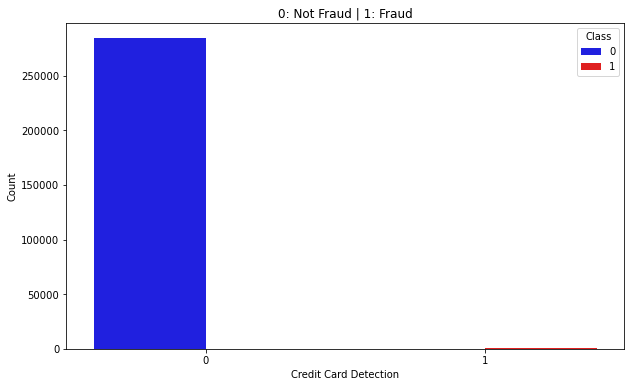

Not Fraud: 99.83%
Fraud: 0.17%


In [13]:
# Not Fruad
df_0 = df_median[df_median['Class'] == 0]

# Fraud
df_1 = df_median[df_median['Class'] == 1]

merged_df = pd.concat([df_0, df_1])

plt.figure(figsize=(10,6))
sns.countplot(data=merged_df, x='Class', hue='Class', palette=['blue', 'red'])
plt.title('0: Not Fraud | 1: Fraud')
plt.xlabel('Credit Card Detection')
plt.ylabel('Count')
plt.legend(title='Class', loc='upper right')
plt.show()

print(f'Not Fraud: {round(len(df_0) / len(df) *100, 2):.2f}%')
print(f'Fraud: {round(len(df_1) / len(df) *100, 2):.2f}%')

In [14]:
X = df_median.drop('Class', axis=1)
y = df_median['Class']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [17]:
# Use ADASYN to handle imbalanced data
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

In [18]:
y_train_adasyn = y_train_adasyn.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

In [19]:
X_train_adasyn.shape

(341131, 29)

## ANN using Median

In [20]:
model_median = Sequential()

model_median.add(Dense(32, activation='relu', input_dim=X_train_adasyn.shape[1]))
model_median.add(Dropout(0.2))

model_median.add(Dense(16, activation='relu'))
model_median.add(Dropout(0.2))

model_median.add(Dense(8, activation='relu'))
model_median.add(Dropout(0.2))

# Output layer, cause it's binary , so use sigmoid
model_median.add(Dense(1, activation='sigmoid'))

model_median.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_median = model_median.fit(X_train_adasyn, y_train_adasyn, epochs=100, validation_data=(X_val, y_val), 
                         callbacks=[early_stopping], shuffle=True, batch_size=32)

history_median

Train on 341131 samples, validate on 56962 samples
Epoch 1/100
341131/341131 [==============================] - 36s 104us/sample - loss: 0.0660 - accuracy: 0.9787 - val_loss: 0.0201 - val_accuracy: 0.9962
Epoch 2/100
341131/341131 [==============================] - 34s 100us/sample - loss: 0.0177 - accuracy: 0.9959 - val_loss: 0.0186 - val_accuracy: 0.9978
Epoch 3/100
341131/341131 [==============================] - 36s 105us/sample - loss: 0.0138 - accuracy: 0.9967 - val_loss: 0.0187 - val_accuracy: 0.9980
Epoch 4/100
341131/341131 [==============================] - 36s 105us/sample - loss: 0.0121 - accuracy: 0.9971 - val_loss: 0.0166 - val_accuracy: 0.9985
Epoch 5/100
341131/341131 [==============================] - 46s 136us/sample - loss: 0.0111 - accuracy: 0.9973 - val_loss: 0.0167 - val_accuracy: 0.9986
Epoch 6/100
341131/341131 [==============================] - 56s 165us/sample - loss: 0.0099 - accuracy: 0.9976 - val_loss: 0.0190 - val_accuracy: 0.9983
Epoch 7/100
341131/341131

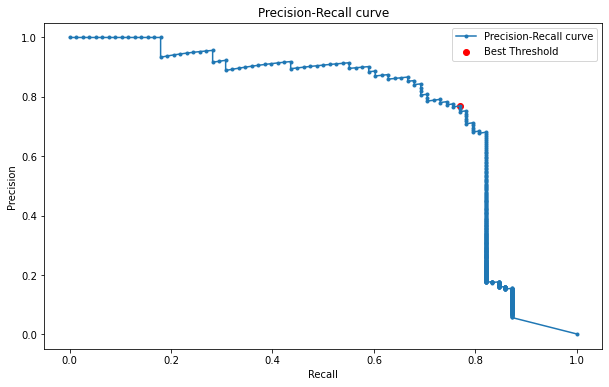

Best Threshold: 0.998647928237915
Best F1 Score: 0.7692307692307693


In [21]:
# For binary classification, predict the probability of each sample in the validation set belonging to 
# the positive class.
# ravel(): Reshapes from two-dimensional to one-dimensional, from (n_sample,1) to (n_sample,), for subsequent analysis.
predictions_proba = model_median.predict(X_val).ravel()

# calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_val, predictions_proba)

# calculate f1-score
f1_scores = 2 * recall * precision / (recall + precision)

# Find the threshold corresponding to the maximum F1 score.
max_f1_index = np.argmax(f1_scores)
best_threshold = thresholds[max_f1_index]
best_f1_score = f1_scores[max_f1_index]

# plot precision recall curve
plt.figure(figsize=(10,6))
plt.plot(recall, precision, marker='.', label='Precision-Recall curve')
plt.scatter(recall[max_f1_index], precision[max_f1_index], marker='o', color='red', label='Best Threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

print(f'Best Threshold: {best_threshold}')
print(f'Best F1 Score: {best_f1_score}')

In [22]:
# Model using at Validation data set
predictions_val = model_median.predict(X_val)
predictions_val = (predictions_val > best_threshold).astype(int)  

# validation classification report
report_val = classification_report(y_val, predictions_val)
print("Validation Set Classification Report:")
print(report_val)

# calculate roc_auc score of validation data set
auc_score_val = roc_auc_score(y_val, predictions_val)
print(f'Validation Set ROC-AUC Score: {round(auc_score_val*100,2):.2f}%')

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56884
           1       0.77      0.76      0.76        78

    accuracy                           1.00     56962
   macro avg       0.88      0.88      0.88     56962
weighted avg       1.00      1.00      1.00     56962

Validation Set ROC-AUC Score: 87.80%


In [23]:
# Final Prediction

predictions_test_proba = model_median.predict(X_test).ravel()

# Use the previously found optimal threshold to convert predicted probabilities into class labels.
predictions_test = (predictions_test_proba > best_threshold).astype(int)

# test classification report
report_test = classification_report(y_test, predictions_test)
print("Test Set Classification Report:")
print(report_test)

# calculate roc_auc score of test data set
auc_score_test = roc_auc_score(y_test, predictions_test)
print(f'Test Set ROC-AUC Score: {round(auc_score_test*100, 2):.2f}%')

Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.76      0.78        98

    accuracy                           1.00     56962
   macro avg       0.91      0.88      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Test Set ROC-AUC Score: 87.74%


In [24]:
model_median.save('Model_median.h5')

## Handle Outliers using Quantile

In [25]:
df_quantile = handle_outliers(df.copy(), 'Amount_log', method='quantile')

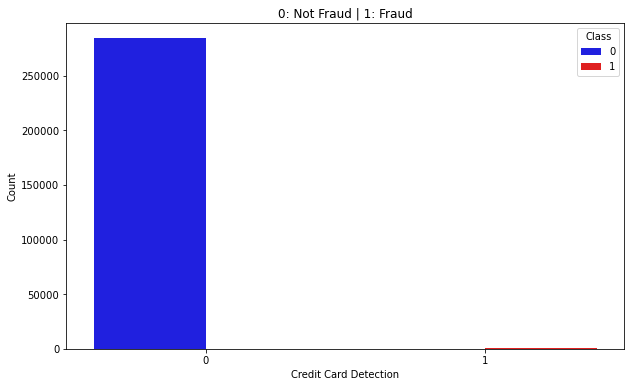

Not Fraud: 99.83%
Fraud: 0.17%


In [26]:
# Not Fruad
df_0 = df_quantile[df_quantile['Class'] == 0]

# Fraud
df_1 = df_quantile[df_quantile['Class'] == 1]

merged_df = pd.concat([df_0, df_1])

plt.figure(figsize=(10,6))
sns.countplot(data=merged_df, x='Class', hue='Class', palette=['blue', 'red'])
plt.title('0: Not Fraud | 1: Fraud')
plt.xlabel('Credit Card Detection')
plt.ylabel('Count')
plt.legend(title='Class', loc='upper right')
plt.show()

print(f'Not Fraud: {round(len(df_0) / len(df) *100, 2):.2f}%')
print(f'Fraud: {round(len(df_1) / len(df) *100, 2):.2f}%')

In [27]:
X = df_quantile.drop('Class', axis=1)
y = df_quantile['Class']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [29]:
# Use ADASYN to handle imbalanced data
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

y_train_adasyn = y_train_adasyn.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

In [30]:
X_train_adasyn.shape

(341106, 29)

## ANN using Quantile

In [32]:
model_quantile = Sequential()

model_quantile.add(Dense(32, activation='relu', input_dim=X_train_adasyn.shape[1]))
model_quantile.add(Dropout(0.2))

model_quantile.add(Dense(16, activation='relu'))
model_quantile.add(Dropout(0.2))

model_quantile.add(Dense(8, activation='relu'))
model_quantile.add(Dropout(0.2))

# Output layer, cause it's binary , so use sigmoid
model_quantile.add(Dense(1, activation='sigmoid'))

model_quantile.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_quantile = model_quantile.fit(X_train_adasyn, y_train_adasyn, epochs=100, validation_data=(X_val, y_val), 
                                      callbacks=[early_stopping], shuffle=True, batch_size=32)

history_quantile

Train on 341106 samples, validate on 56962 samples
Epoch 1/100
341106/341106 [==============================] - 47s 138us/sample - loss: 0.0630 - accuracy: 0.9828 - val_loss: 0.0184 - val_accuracy: 0.9969
Epoch 2/100
341106/341106 [==============================] - 51s 149us/sample - loss: 0.0195 - accuracy: 0.9967 - val_loss: 0.0145 - val_accuracy: 0.9977
Epoch 3/100
341106/341106 [==============================] - 47s 138us/sample - loss: 0.0156 - accuracy: 0.9974 - val_loss: 0.0121 - val_accuracy: 0.9986
Epoch 4/100
341106/341106 [==============================] - 51s 149us/sample - loss: 0.0144 - accuracy: 0.9975 - val_loss: 0.0139 - val_accuracy: 0.9986
Epoch 5/100
341106/341106 [==============================] - 50s 147us/sample - loss: 0.0131 - accuracy: 0.9975 - val_loss: 0.0137 - val_accuracy: 0.9988
Epoch 6/100
341106/341106 [==============================] - 50s 147us/sample - loss: 0.0125 - accuracy: 0.9978 - val_loss: 0.0158 - val_accuracy: 0.9988
Epoch 7/100
341106/341106

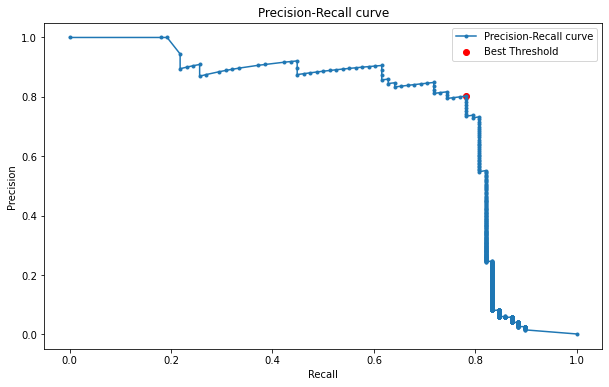

Best Threshold: 0.9995423555374146
Best F1 Score: 0.7922077922077922


In [33]:
# For binary classification, predict the probability of each sample in the validation set belonging to 
# the positive class.
# ravel(): Reshapes from two-dimensional to one-dimensional, from (n_sample,1) to (n_sample,), for subsequent analysis.
predictions_proba = model_quantile.predict(X_val).ravel()

# calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_val, predictions_proba)

# calculate f1-score
f1_scores = 2 * recall * precision / (recall + precision)

# Find the threshold corresponding to the maximum F1 score.
max_f1_index = np.argmax(f1_scores)
best_threshold = thresholds[max_f1_index]
best_f1_score = f1_scores[max_f1_index]

# plot precision recall curve
plt.figure(figsize=(10,6))
plt.plot(recall, precision, marker='.', label='Precision-Recall curve')
plt.scatter(recall[max_f1_index], precision[max_f1_index], marker='o', color='red', label='Best Threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

print(f'Best Threshold: {best_threshold}')
print(f'Best F1 Score: {best_f1_score}')

In [34]:
# Model using at Validation data set
predictions_val = model_quantile.predict(X_val)
predictions_val = (predictions_val > best_threshold).astype(int)  

# validation classification report
report_val = classification_report(y_val, predictions_val)
print("Validation Set Classification Report:")
print(report_val)

# calcualte roc_auc score of validation data set
auc_score_val = roc_auc_score(y_val, predictions_val)
print(f'Validation Set ROC-AUC Score: {round(auc_score_val*100,2):.2f}%')

Validation Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56884
           1       0.80      0.77      0.78        78

    accuracy                           1.00     56962
   macro avg       0.90      0.88      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Validation Set ROC-AUC Score: 88.45%


In [35]:
# Final Prediction

predictions_test_proba = model_quantile.predict(X_test).ravel()

# Convert predicted probabilities into class labels using the previously found optimal threshold.
predictions_test = (predictions_test_proba > best_threshold).astype(int)

# test classification report
report_test = classification_report(y_test, predictions_test)
print("Test Set Classification Report:")
print(report_test)

# calculate roc_auc score
auc_score_test = roc_auc_score(y_test, predictions_test)
print(f'Test Set ROC-AUC Score: {round(auc_score_test*100, 2):.2f}%')

Test Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.83      0.81        98

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Test Set ROC-AUC Score: 91.31%


### Model Explanation

- **Precision**  
   Precision represents the proportion of samples predicted as positive by the model that are actually positive. In this case, the precision is `0.79`, indicating that when the model predicts a sample as class 1, there is a `79% `probability of being correct.
   
- **Recall**  
  Recall represents the proportion of all positive samples that are correctly identified by the model. The recall of this model is `0.83`, indicating that the model can identify `83%` of actual class` 1 `samples.

- **F1-score**  
  The F1-score is the harmonic mean of precision and recall, used to evaluate the overall performance of the model in imbalanced data. The F1-score in this case is `0.81`, showing a good balance between the two.

- **ROC-AUC Score**  
  The ROC-AUC Score measures the model's ability to distinguish between classes, with a value of `91.31%`indicating a good discriminative ability of the model.

In [36]:
model_quantile.save('Model_quantile.h5')